In [2]:
import pandas as pd

# Load the data set

In [3]:
df = pd.read_csv("sales_data_with_discounts.csv");

# Descriptive Analytics for Numerical Columns

In [7]:
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nNumerical Columns:", numerical_cols.tolist())

statistics = df[numerical_cols].agg(['mean', 'median', 'std']).T
mode_values = df[numerical_cols].mode().iloc[0]
statistics['mode'] = mode_values
print("\nDescriptive Statistics for Numerical Columns:")
print(statistics)

print("\nInterpretation:")
for col in numerical_cols:
    print(f"- {col}: Mean = {statistics.loc[col, 'mean']:.2f}, Median = {statistics.loc[col, 'median']:.2f}, Mode = {statistics.loc[col, 'mode']:.2f}, Std Dev = {statistics.loc[col, 'std']:.2f}")


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

Descriptive Statistics for Numerical Columns:
                           mean       median           std          mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801

Interpretation:
- Volume: Mean = 5.07, Median = 4.00, Mode = 3.00, Std Dev = 4.23
- Avg Price: Mean = 10453.43, Median = 1450.00, Mode = 400.00, Std Dev = 18079.90
- Total Sales Value: Mean = 33812.84, Median = 5700.00, Mode = 24300.00, Std Dev = 50535.07
- Discount Rate (%): Mean = 15.16, Median = 16.58, Mode = 5.0

## Data Visualization

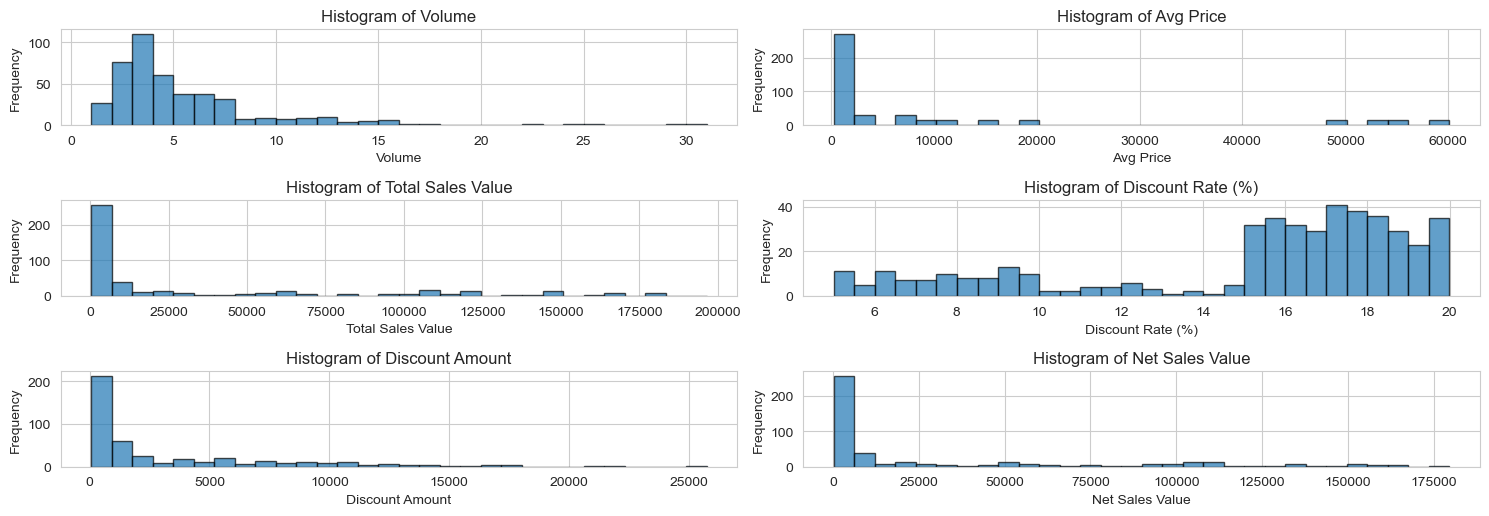

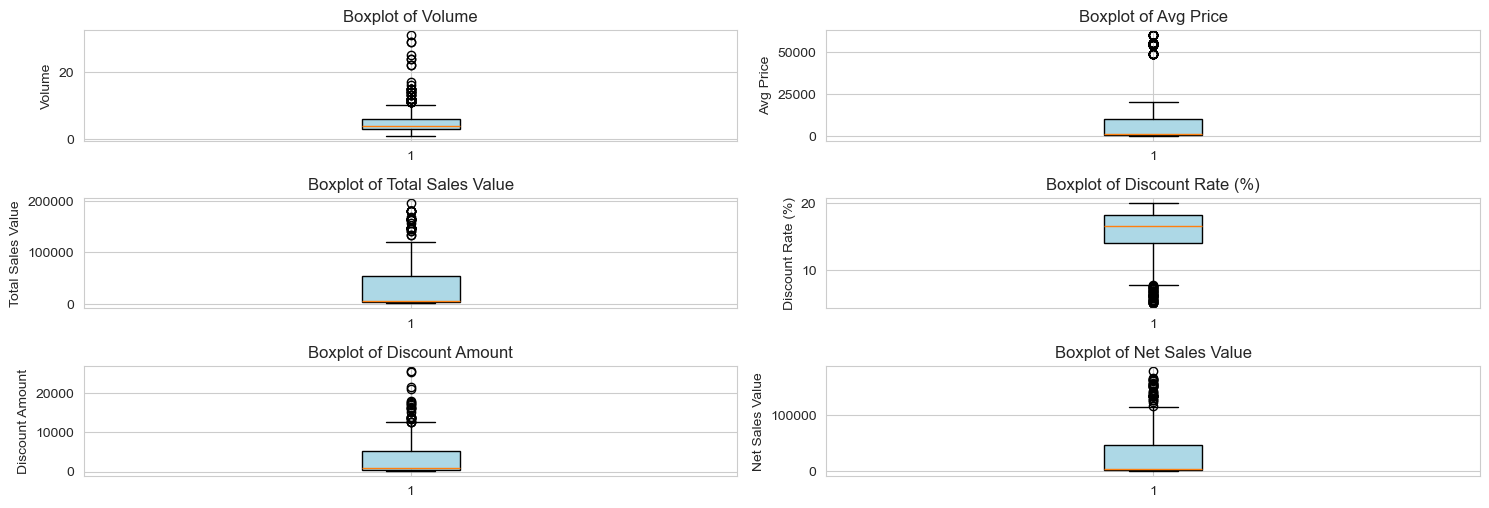

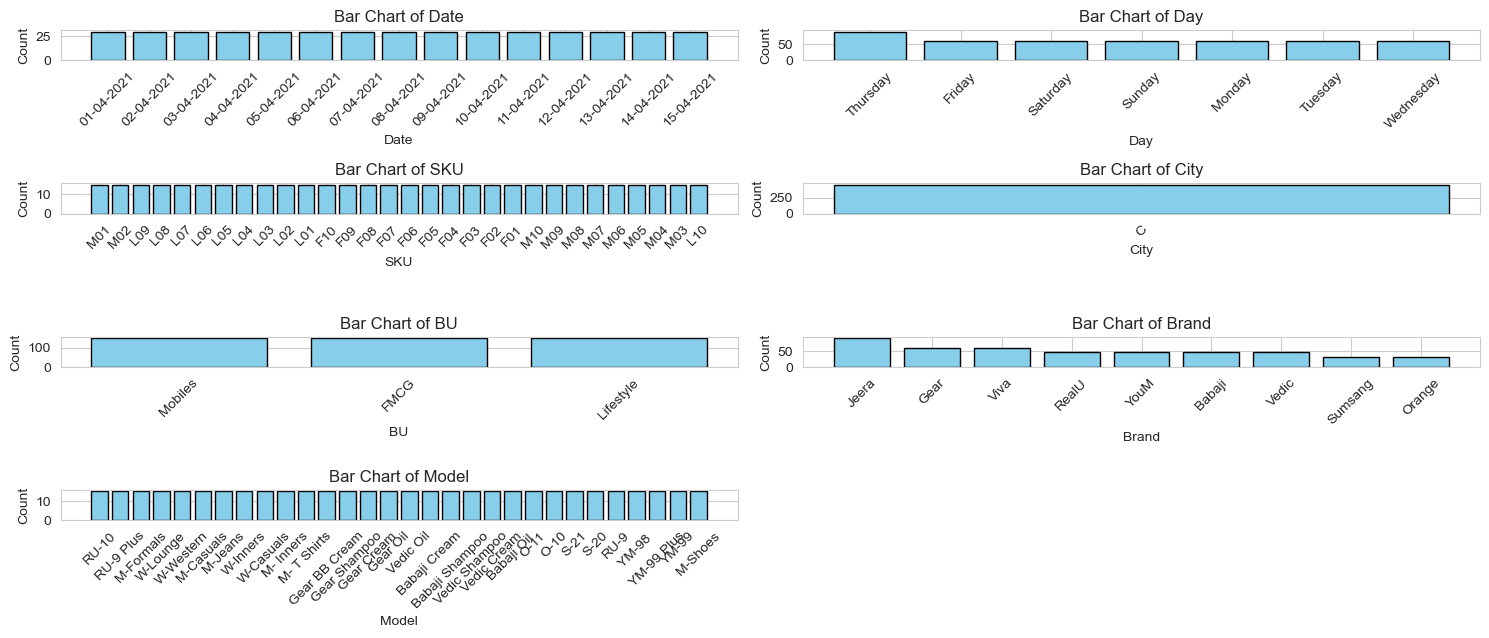


Observations:
- Histograms: Identify skewness and presence of outliers.
- Boxplots: Detect extreme values and interquartile range.
- Bar Charts: Analyze distribution of categorical variables.


In [23]:
import matplotlib.pyplot as plt

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    plt.boxplot(df[col].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Bar charts for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, i + 1)
    value_counts = df[col].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Observations
print("\nObservations:")
print("- Histograms: Identify skewness and presence of outliers.")
print("- Boxplots: Detect extreme values and interquartile range.")
print("- Bar Charts: Analyze distribution of categorical variables.")


## Standardization of Numerical Variables

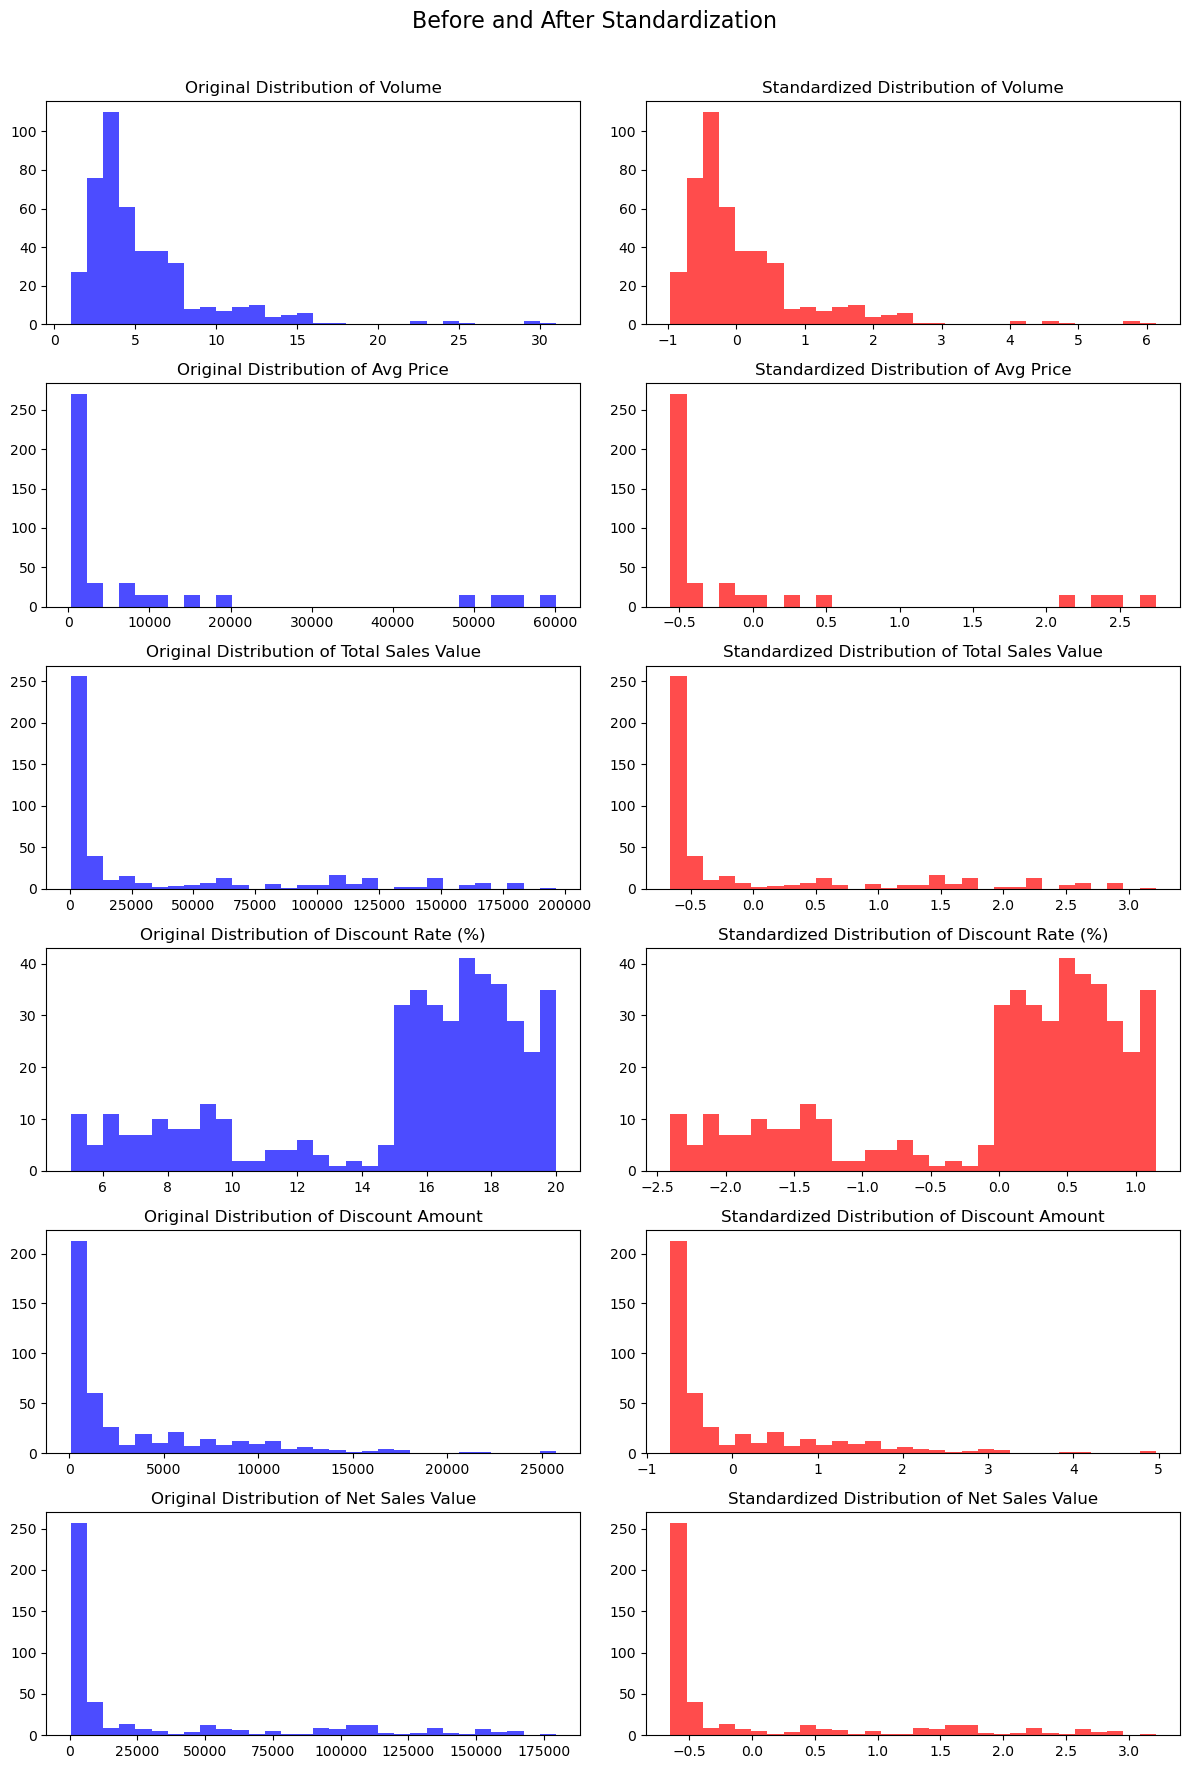

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Select numerical columns for standardization
numerical_cols = ["Volume", "Avg Price", "Total Sales Value", "Discount Rate (%)", "Discount Amount", "Net Sales Value"]

# Compute standardized values using z-score normalization
df_standardized = df.copy()
df_standardized[numerical_cols] = df[numerical_cols].apply(lambda x: (x - x.mean()) / x.std())

# Plot before and after distributions
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 18))
fig.suptitle("Before and After Standardization", fontsize=16)

for i, col in enumerate(numerical_cols):
    # Original Distribution
    axes[i, 0].hist(df[col], bins=30, color="blue", alpha=0.7)
    axes[i, 0].set_title(f"Original Distribution of {col}")
    
    # Standardized Distribution
    axes[i, 1].hist(df_standardized[col], bins=30, color="red", alpha=0.7)
    axes[i, 1].set_title(f"Standardized Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Conversion of Categorical Data into Dummy Variables

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Identify categorical columns
categorical_cols = ["Date", "Day", "SKU", "City", "BU", "Brand", "Model"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...